In [1]:
import os
os.listdir()
import sklearn
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.optimize as opt


# loading data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Digit Recognition.ipynb',
 'ex3data1.mat',
 'ex3weights.mat',
 'Neural network .ipynb']

In [3]:
from scipy.io import loadmat
data = loadmat('ex3data1.mat')


In [4]:
print(type(data))

<class 'dict'>


In [5]:
print(data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [6]:
X = data['X']
y = data['y']
print(X.shape)
print(y.shape)


(5000, 400)
(5000, 1)


# vizualizing the data

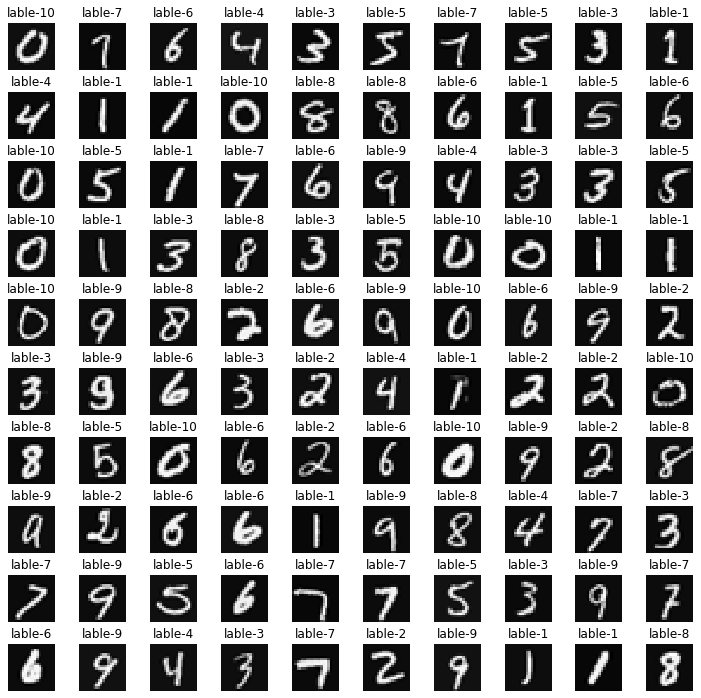

In [7]:
# vizualizing the data with the labels on it 
#random 100 rows are selected and columns(400) are reshaped into 20x20 pixels

import matplotlib.image as mpimg

fig, axis = plt.subplots(10,10,figsize=(10,10))

rnx = np.array(random.choices(range(5001),k=100)).reshape(10,10)
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[rnx[i][j],:].reshape(20,20,order='F'),cmap='gist_gray',interpolation='nearest') #reshape back to 20 pixel by 20 pixel
        axis[i,j].axis("off")
        axis[i,j].set_title("lable-%i"%y[rnx[i][j]])
        plt.tight_layout()
        

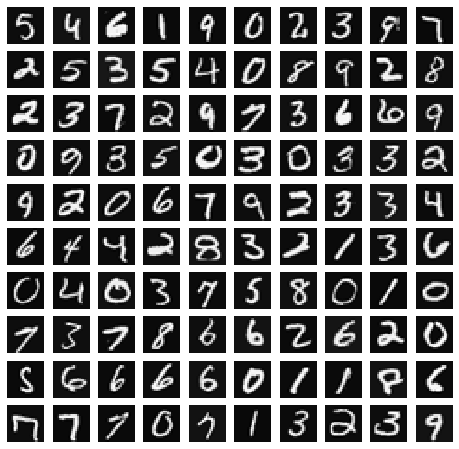

In [8]:
#vizualizing the data without the labels on it.
fig, axes = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axes[i][j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order='F'),cmap='gist_gray',interpolation='nearest')
        axes[i][j].axis('off')
        

# sigmoid function


In [9]:
def hypothesis(x,theta):
    z=x.dot(theta)
    hx = 1/(1+np.exp(-z))
    #5000x1
    return(hx)

# Regularized cost function

In [10]:
def computecost(theta,x,y,lambd):  #costfunction
    
    
    m , n = x.shape
   
    hx = hypothesis(x,theta.reshape((n,1))) # mx1
    
    first = -y*np.log(hx)   #mx1
    
    second = (1-y)*(np.log((1-hx))) #mx1
    
    error = first - second #mx1
 
    regularize  = lambd/(2*m)*sum(theta[1:]**2) #1x1
    
    cost = (1/m)*sum(error) #1x1 scalar
    
    reglcost = cost+ regularize

    return(reglcost)

theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t =np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
print("y_t.shape: ",y_t.shape)
print("X_t: \n",X_t)
print("X_t.shape: ",X_t.shape)
costp = computecost(theta_t,X_t,y_t,3)

print("costp: ",costp)

y_t.shape:  (5, 1)
X_t: 
 [[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]
X_t.shape:  (5, 4)
costp:  [2.5348194]


# Regularized gradient function


In [11]:
#complete vectorized 

def gradient(theta,x,y,lambd):
    m,n = x.shape
    theta=theta.reshape((n,1))  #important to reshpe the theta matrix
    hx = hypothesis(x,theta.reshape((n,1)))
    grad = np.array(np.zeros((n,1)))     #400x1
    
    grad[0] = 1.0 / m * (x.T.dot((hx-y)))[0]
    grad[1:] =  1.0 / m * (x.T.dot((hx-y)))[1:] + (lambd/m)*theta[1:]
    return (grad)
gradient(theta_t,X_t,y_t,3)

array([[ 0.14656137],
       [-0.54855841],
       [ 0.72472227],
       [ 1.39800296]])

# One vs all classification

In [12]:
X = np.c_[np.ones((5000,1)),X]
m,n = X.shape
print(X.shape)
lambd = 1
theta_all = [] 
y = np.where(y==10,0,y) # setting label= 0 instead of 10 for 0
for i in range(10):
    y_refine = np.array(y==i).astype(int) #refining y as y=1 if y==i else 0 
    theta_initial = np.array(np.zeros(n)) # 1-d 
    thetaf , nf ,rc  = opt.fmin_tnc(func=computecost, x0=theta_initial ,fprime=gradient,args=(X,y_refine,lambd))
    theta_all.append(thetaf)
theta_all = np.array(theta_all)
print(theta_all.shape)

(5000, 401)
(10, 401)


# One vs all Prediction

In [13]:
def prediction(x,theta):
    n = len(x)
    x = x.reshape((1,n))
    theta = theta.reshape((n,1))
    z=x.dot(theta)
    hx = 1/(1+np.exp(-z))
    return(hx)

In [14]:
#predict all

predict = []
for i in range(m):
    probability  = []
    l = len(theta_all)
    for j in range(len(theta_all)) :
        pred = prediction(X[i],theta_all[j])
        probability.append(pred)
    label = probability.index(max(probability))
    predict.append(label)
predict = np.array(predict).reshape((m,1))

In [15]:
accuracy = np.mean(predict==y)*100
accuracy

94.46

label :  8


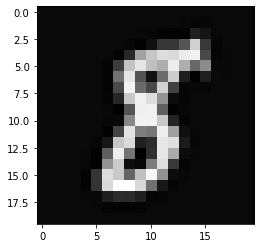

In [16]:
#predicting individually

probability  = []
for j in range(len(theta_all)) :
    pred = prediction(X[4008],theta_all[j])
    probability.append(pred)

label = probability.index(max(probability))
print("label : ",label)

plt.imshow(X[4008,1:].reshape(20,20,order='F'),cmap = 'gist_gray')